## Random Forest Algorithm

In [1]:
#importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/Users/bibekrai/Downloads/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x=data.iloc[:,[2]].values.reshape(-1,1)
y=data.iloc[:,[3]].values.reshape(-1,1)

Text(0.5, 1.0, 'Age vs Income')

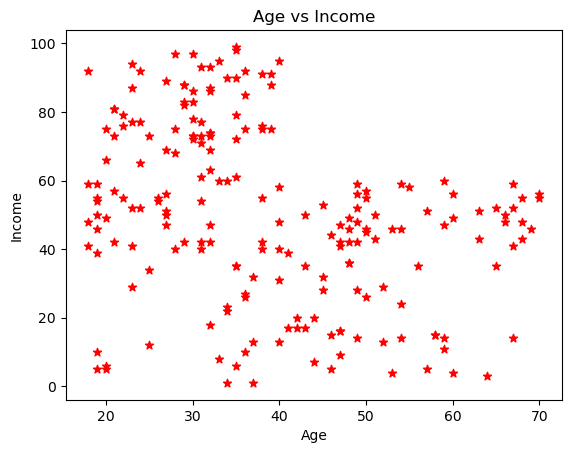

In [18]:
plt.scatter(data['Age'],data['Spending Score'],marker='*',color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

In [94]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=0,test_size=199)

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit(x_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [97]:
y_pred=classifier.predict([[30]])
y_pred

array([46])

In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [99]:
cm

array([[0, 0],
       [1, 0]])

Text(0.5, 1.0, 'Predicted vs Truth')

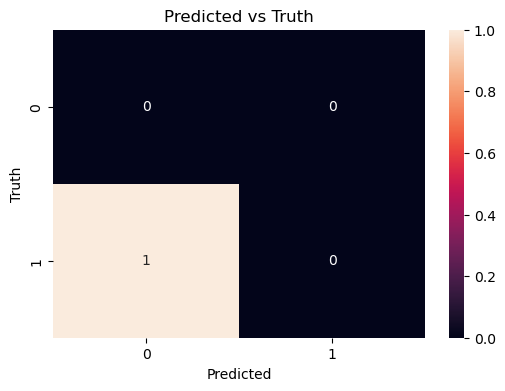

In [108]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Predicted vs Truth')